In [9]:
'''Make figures of reconstruction quality.'''


import os
import yaml

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Functions #####################################################

def weird_form_to_long(df, target_col, identify_cols=[]):
    df_result = pd.DataFrame()
    for i, row in df.iterrows():
        tmp = {}
        for col in identify_cols:
            tmp[col] = row[col]
        tmp[target_col] = row[target_col]
        df_result = pd.concat([df_result, pd.DataFrame(tmp)])
    return df_result

In [3]:
# Settings #######################################################
conf_file = "config/recon_vggsound_fmriprep_rep4_500voxel_vggishish_allunits_fastl2lir_alpha100.yaml"
output_dir = '../data/figures'

with open(conf_file, 'r') as f:
    conf = yaml.safe_load(f)
quality_file = os.path.join(conf['eval feat output dir'], "quality.pkl.gz")
audiofeature_quality_file = os.path.join(conf['eval feat output dir'], "quality_audiofeature.pkl.gz")
eval_feats = ["mel", "conv1", "conv5", "mix5_d", "mix6_e", "mix7_c", "fc1", "f0", "sc", "hnr"]

subjects = conf['recon subjects']
rois = conf['recon rois']
layers = list(conf['recon layers'].keys())

#print("Qaultiy filepath:", quality_file)
print("Audio feature qaultiy filepath:", audiofeature_quality_file)
print("Subjects:   {}".format(subjects))
print("ROIs:       {}".format(rois))
print("Layers:     {}".format(layers))
print("Eval feats: {}".format(eval_feats))
quality_df = pd.read_pickle(quality_file)
aud_quality_df = pd.read_pickle(audiofeature_quality_file)
quality_df = pd.concat([quality_df, aud_quality_df])
display(quality_df)



Audio feature qaultiy filepath: ../data/recon_features/VGGishish/sound_recon/melception/quality_audiofeature.pkl.gz
Subjects:   ['S1', 'S2', 'S3', 'S4', 'S5']
ROIs:       ['AC']
Layers:     ['conv5_3']
Eval feats: ['mel', 'conv1', 'conv5', 'mix5_d', 'mix6_e', 'mix7_c', 'fc1', 'f0', 'sc', 'hnr']


,layer,subject,roi,eval_feat,identification accuracy,pattern correlation,profile correlation,euclidean distance
0,conv5_3,S1,AC,conv1,"[0.6912751677852349, 0.9932885906040269, 0.859...","[0.15021985441292882, 0.24868302278240947, 0.2...","[0.2970476536540395, 0.2746015955848461, 0.239...",NaN
1,conv5_3,S1,AC,conv2,"[0.825503355704698, 0.9932885906040269, 0.8255...","[0.05562326985196835, 0.18237903665847083, 0.0...","[0.18112456093734097, 0.05550251094126953, 0.1...",NaN
2,conv5_3,S1,AC,conv3,"[0.7181208053691275, 0.9932885906040269, 0.771...","[0.03819071283967895, 0.1440855567305437, 0.05...","[0.07119102038433074, 0.15227237406762123, 0.0...",NaN
3,conv5_3,S1,AC,conv4,"[0.5973154362416108, 0.9932885906040269, 0.684...","[0.022788904911865637, 0.09284070614601951, 0....","[-0.04160442232442089, 0.07782469459938621, 0....",NaN
4,conv5_3,S1,AC,conv5,"[0.4697986577181208, 0.9932885906040269, 0.637...","[0.007833656170536807, 0.08539407704963989, 0....","[-0.09102143062439194, 0.02734660061511242, -0...",NaN
...,...,...,...,...,...,...,...,...
10,conv5_3,S4,AC,hnr,"[0.46938777, 0.7755102, 0.5102041, 0.75510204,...",NaN,NaN,"[7.769221368040502, 3.837956538980845, 4.38341..."
11,conv5_3,S4,AC,sc,"[0.3877551, 0.0, 0.7346939, 0.9591837, 0.97959...",NaN,NaN,"[762.0149490244467, 681.599440310283, 932.1776..."
12,conv5_3,S5,AC,f0,"[0.5869565010070801, nan, 0.47826087474823, 0....",NaN,NaN,"[132.80106758281386, 44.269078723746986, 28.48..."
13,conv5_3,S5,AC,hnr,"[0.5510204, 0.9183673, 0.08163265, 0.9591837, ...",NaN,NaN,"[2.6590388933268523, 0.5133033571296339, 2.214..."


In [7]:
# Prepare the data for plotting #################################
a_df = quality_df.query("layer == 'conv5_3' and roi == 'AC'")
ident_df = a_df[["subject", "eval_feat", "identification accuracy"]]
ident_df = weird_form_to_long(ident_df, "identification accuracy", ["subject", "eval_feat"])


Saved ../data/figures/Fig4C.png


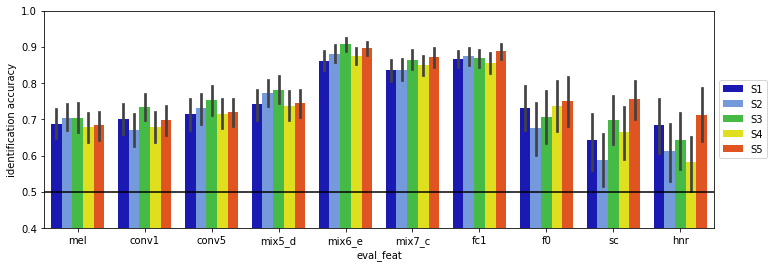

In [12]:
# Fig.3E Identification accuracy #################################
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(ax=ax, 
            data=ident_df, 
            x="eval_feat", order=eval_feats,
            y="identification accuracy",  
            hue="subject", 
            palette=["mediumblue", "cornflowerblue", "limegreen", "yellow", "orangered"])
ax.set_ylim([0.4, 1.0])
ax.axhline(0.5, color='k', linestyle='-')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
save_filename = os.path.join(output_dir, 'Fig4C.png')
fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
print('Saved {}'.format(save_filename))

